**Exercice 1 :** Implémenter un programme d'un réseau neurones artificiel avec une seule couche caché et un seul sorite en modifiant le programme de l’exercice 1 de TP1

***1.*** Importer les bibliothèques NumPy, Matplotlib et dataset make_circles dans
sklearn

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

***2.*** Utiliser la fonction make_circles pour générer 100 points avec bruit (noise=0.1)
et un facteur (factor=0.3) et une valeur random_state=0 (garantir la
reproductibilité des résultats).

In [70]:

# Générer un jeu de données en forme de cercles
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3)


***3.*** Transformer la variable X en un tableau de forme (2, 100) et la variable y en un
tableau de forme (1, 100).

In [71]:
# Transformer X en un tableau de forme (2, 100)
X = X.T  # Transpose de (100, 2) vers (2, 100)

# Transformer y en un tableau de forme (1, 100)
y = y.reshape(1, -1)  # reshape de (100,) vers (1, 100)

***4.*** Afficher les points de données sur un graphique

Forme de X : (2, 100)
Forme de y : (1, 100)


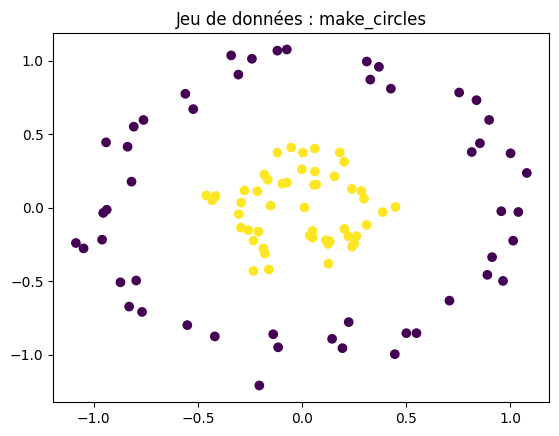

In [72]:
# Affichage des formes pour vérifier
print("Forme de X :", X.shape)
print("Forme de y :", y.shape)

# Afficher le graphique
plt.scatter(X[0, :], X[1, :], c=y.flatten(), cmap='viridis')
plt.title("Jeu de données : make_circles")
plt.show()

***5.*** Implémenter une fonction initialisation (n1,n0) qui retourne un dictionnaire des paramètres W1,W2,W3, b1, b2 et b3 avec :

In [73]:

def initialisation(n0,n1,n2):
    # Initialisation des poids W1, W2
    W1 = np.random.randn(n1, n0) * 0.01
    W2 = np.random.randn(n2, n1) * 0.01

    # Initialisation des biais b1, b2
    b1 = np.zeros((n1, 1))
    b2 = np.zeros((n2, 1))

    # Retourner les paramètres sous forme de dictionnaire
    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2,
    }

    return parameters

# Exemple d'appel de la fonction
n1, n0,n2 = 2, 2, 1  # Exemple de tailles
params = initialisation(n0, n1, n2)

# Afficher les paramètres pour vérifier
for key, value in params.items():
    print(f"{key} : {value.shape}")


W1 : (2, 2)
W2 : (1, 2)
b1 : (2, 1)
b2 : (1, 1)


***6.*** Implémenter une fonction forward_propagation(X, dict_parametres) (voir la page 2 le groupe formules (1) ) qui retourne un dictionnaire des activations A0 et A1

In [74]:
def forward_propagation(X, dict_parametres):
    # Récupérer les paramètres
    W1 = dict_parametres["W1"]
    b1 = dict_parametres["b1"]
    W2 = dict_parametres["W2"]
    b2 = dict_parametres["b2"]

    # Calcul de A0 (c'est l'entrée X)
    A0 = X

    # Propagation vers la première couche cachée
    Z1 = np.dot(W1, A0) + b1
    A1 = 1 / (1 + np.exp(-Z1))  # Sigmoïde

    # Propagation vers la couche de sortie
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))  # Sigmoïde pour la sortie

    # Retourner les activations sous forme de dictionnaire
    activations = {"A0": A0, "A1": A1, "A2": A2}
    return activations


***7.*** Implémenter une fonction log_loss(A, y)

In [75]:
def log_loss(A, y):
    m = y.shape[1]  # Nombre d'exemples
    # Calcul de la log-loss
    loss = - (1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss


***8. ***Implémenter une fonction backward_propagation (X, y, parametres, activations)
qui retourne un dictionnaire gradients des paramètres dW1,dW2,dW3, db1, db2
et db3 (voir page 2 le groupe formules (2) )

In [76]:
def backward_propagation(X, y, parametres, activations):
    # Récupérer les paramètres
    W1, W2 = parametres["W1"], parametres["W2"]

    # Récupérer les activations
    A0, A1, A2 = activations["A0"], activations["A1"], activations["A2"]
    m = y.shape[1]

    # Calcul de l'erreur de la couche de sortie
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # Rétropropagation dans la première couche cachée
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = (1 / m) * np.dot(dZ1, A0.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # Retourner les gradients sous forme de dictionnaire
    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients


***9.*** Implémenter une fonction update(gradients, parametres, learning_rate) qui
retourne un dictionnaire des nouveaux paramètres W1,W2,W3, b1, b2 et db3

In [ ]:
def update(gradients, parametres, learning_rate):
    # Récupérer les paramètres actuels
    W1 = parametres["W1"]
    b1 = parametres["b1"]
    W2 = parametres["W2"]
    b2 = parametres["b2"]

    # Récupérer les gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    # Mettre à jour les paramètres
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Retourner les nouveaux paramètres sous forme de dictionnaire
    nouveaux_parametres = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return nouveaux_parametres


10. Implémenter une fonction predict(X, parametres) avec un seuil A2>= 0.5

In [ ]:
def predict(X, parametres):
    # Propagation vers l'avant
    activations = forward_propagation(X, parametres)
    A2 = activations["A2"]
    
    # Appliquer le seuil de 0.5
    predictions = (A2 >= 0.5).astype(int)
    
    return predictions

2
1


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def neural_network(X, y, learning_rate=0.1, n1=2, n_iter=1000):
    # Initialisation des paramètres
    n_x = X.shape[0]  # Nombre de caractéristiques d'entrée
    n_y = y.shape[0]  # Nombre de sorties (1 pour la classification binaire)
    
    parametres=initialisation(n_x,n1,n_y)

    # Liste pour stocker l'accuracy et le taux d'erreur au fil des itérations
    accuracies = []
    errors = []

    for i in range(n_iter):
        # Propagation avant
        activations = forward_propagation(X, parametres)
        
        # Récupération des activations de la sortie
        A2 = activations["A2"]
        
        # Calcul des gradients
        gradients = backward_propagation(X, y, parametres, activations)
        
        # Mise à jour des paramètres
        parametres = update(gradients, parametres, learning_rate)
        
        # Calcul de l'accuracy et du taux d'erreur
        predictions = predict(X, parametres)
        accuracy = accuracy_score(y.flatten(), predictions.flatten())
        error_rate = 1 - accuracy
        
        # Stockage des résultats
        accuracies.append(accuracy)
        errors.append(error_rate)
        
        # Affichage du progrès toutes les 100 itérations
        if i % 100 == 0:
            print(f"Iteration {i}, Accuracy: {accuracy:.4f}, Error rate: {error_rate:.4f}")
    
    # Affichage des graphiques de l'accuracy et du taux d'erreur
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(n_iter), accuracies, label='Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.grid(True)
    
    # Plot error rate
    plt.subplot(1, 2, 2)
    plt.plot(range(n_iter), errors, label='Error Rate', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs Iterations')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    return parametres


Iteration 0, Accuracy: 0.5000, Error rate: 0.5000
Iteration 100, Accuracy: 0.3400, Error rate: 0.6600
Iteration 200, Accuracy: 0.4800, Error rate: 0.5200
Iteration 300, Accuracy: 0.4700, Error rate: 0.5300
Iteration 400, Accuracy: 0.4700, Error rate: 0.5300
Iteration 500, Accuracy: 0.4700, Error rate: 0.5300
Iteration 600, Accuracy: 0.4700, Error rate: 0.5300
Iteration 700, Accuracy: 0.4700, Error rate: 0.5300
Iteration 800, Accuracy: 0.4700, Error rate: 0.5300
Iteration 900, Accuracy: 0.4700, Error rate: 0.5300


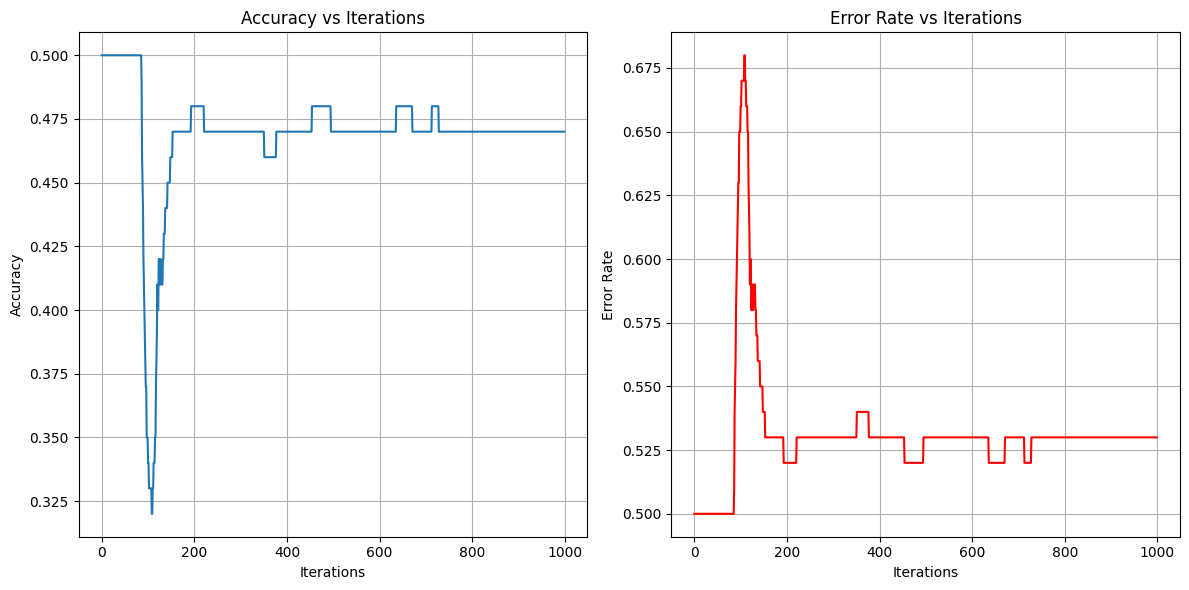

{'W1': array([[ 0.00613935, -0.01808025],
        [-0.00279995, -0.01164805],
        [ 0.01079454,  0.00952955],
        [ 0.00365584,  0.01113963]]),
 'b1': array([[ 6.24836473e-06],
        [-3.37875197e-06],
        [ 6.30426745e-06],
        [-1.09123668e-05]]),
 'W2': array([[ 0.00913472, -0.00367811,  0.00794721, -0.01778682]]),
 'b2': array([[0.00218567]])}

In [81]:
neural_network(X, y, learning_rate=0.1, n1=4, n_iter=1000)